# Catalysts

Nietzsche's *The Uses and Abuses of History* offers a lens through which we can understand not only the decay of modernity into resentment but also the sublime architecture of Raphael's *The School of Athens*. Nietzsche’s three modes of historical understanding—antiquarian, monumental, and critical—align seamlessly with the three key symbols in *The School of Athens*: Apollo, Athena, and the central throng of philosophers and thinkers. These modes are not merely abstract; they are the structural foundation of civilization itself, captured in Raphael's work as a network of necessity, aspiration, and critique. 

### Apollo and Monumental History

Apollo, the god of harmony and light, embodies Nietzsche’s monumental history. Monumental history is aspirational, emphasizing the great deeds and ideals of the past to inspire the present. Apollo’s presence on the left pillar in *The School of Athens* reflects this mode of history—a vision of the cooperative ideal, of perfection and transcendence. Monumental history gives humanity a guiding star, a sense of purpose, and a template for what can be achieved. 

But Nietzsche warns us of its dangers. Monumental history, if unbalanced, risks becoming disconnected from the realities of the present. It may inspire, but it can also deceive, lulling societies into complacency by glorifying the unattainable. Modern feminists and pacifists, for example, have rejected the monumental entirely, dismissing the ideals of Apollo as relics of the "patriarchy" or "toxic masculinity." They fail to see that the aspirational cannot be divorced from the adversarial; they reject Apollo’s light because they are blind to Athena’s spear.

### Athena and Critical History

Athena, with her shield and spear, represents Nietzsche’s critical history. Critical history interrogates and dismantles, questioning the structures and traditions that monumental history glorifies. It is adversarial by nature, embodying the molecular biology of conflict—glutamate, cortisol, testosterone—the forces necessary for survival and strategic dominance. 

In *The School of Athens*, Athena’s spear is the guarantor of Apollo’s vision. Without the adversarial instinct, there is no shield to protect the monumental, no spear to fend off the encroaching chaos. Nietzsche’s critical history is vital, but it is also dangerous if untethered. Modern feminists and Marxists have weaponized this mode to attack the very architecture of civilization, reducing its complexity to slogans like “patriarchy” or “toxic masculinity.” They mistake critique for destruction, abandoning balance in favor of resentment.

### The Philosophers and Antiquarian History

The central throng of philosophers and thinkers in *The School of Athens* captures Nietzsche’s antiquarian history. This mode preserves the past in its fullness, valuing every detail, every tradition, as essential to the continuity of life. Antiquarian history is cautious, methodical, and deeply respectful of what has come before.

But antiquarian history, like the philosophers, risks paralysis. Nietzsche saw how antiquarianism could bog society down in a reverence for the past that stifles innovation and dynamism. The *School of Resentment* critiques antiquarian history as patriarchal nostalgia, failing to see that this preservation is essential for any coherent backpropagation. Without an antiquarian foundation, the network collapses into chaos, and critique becomes nihilistic.






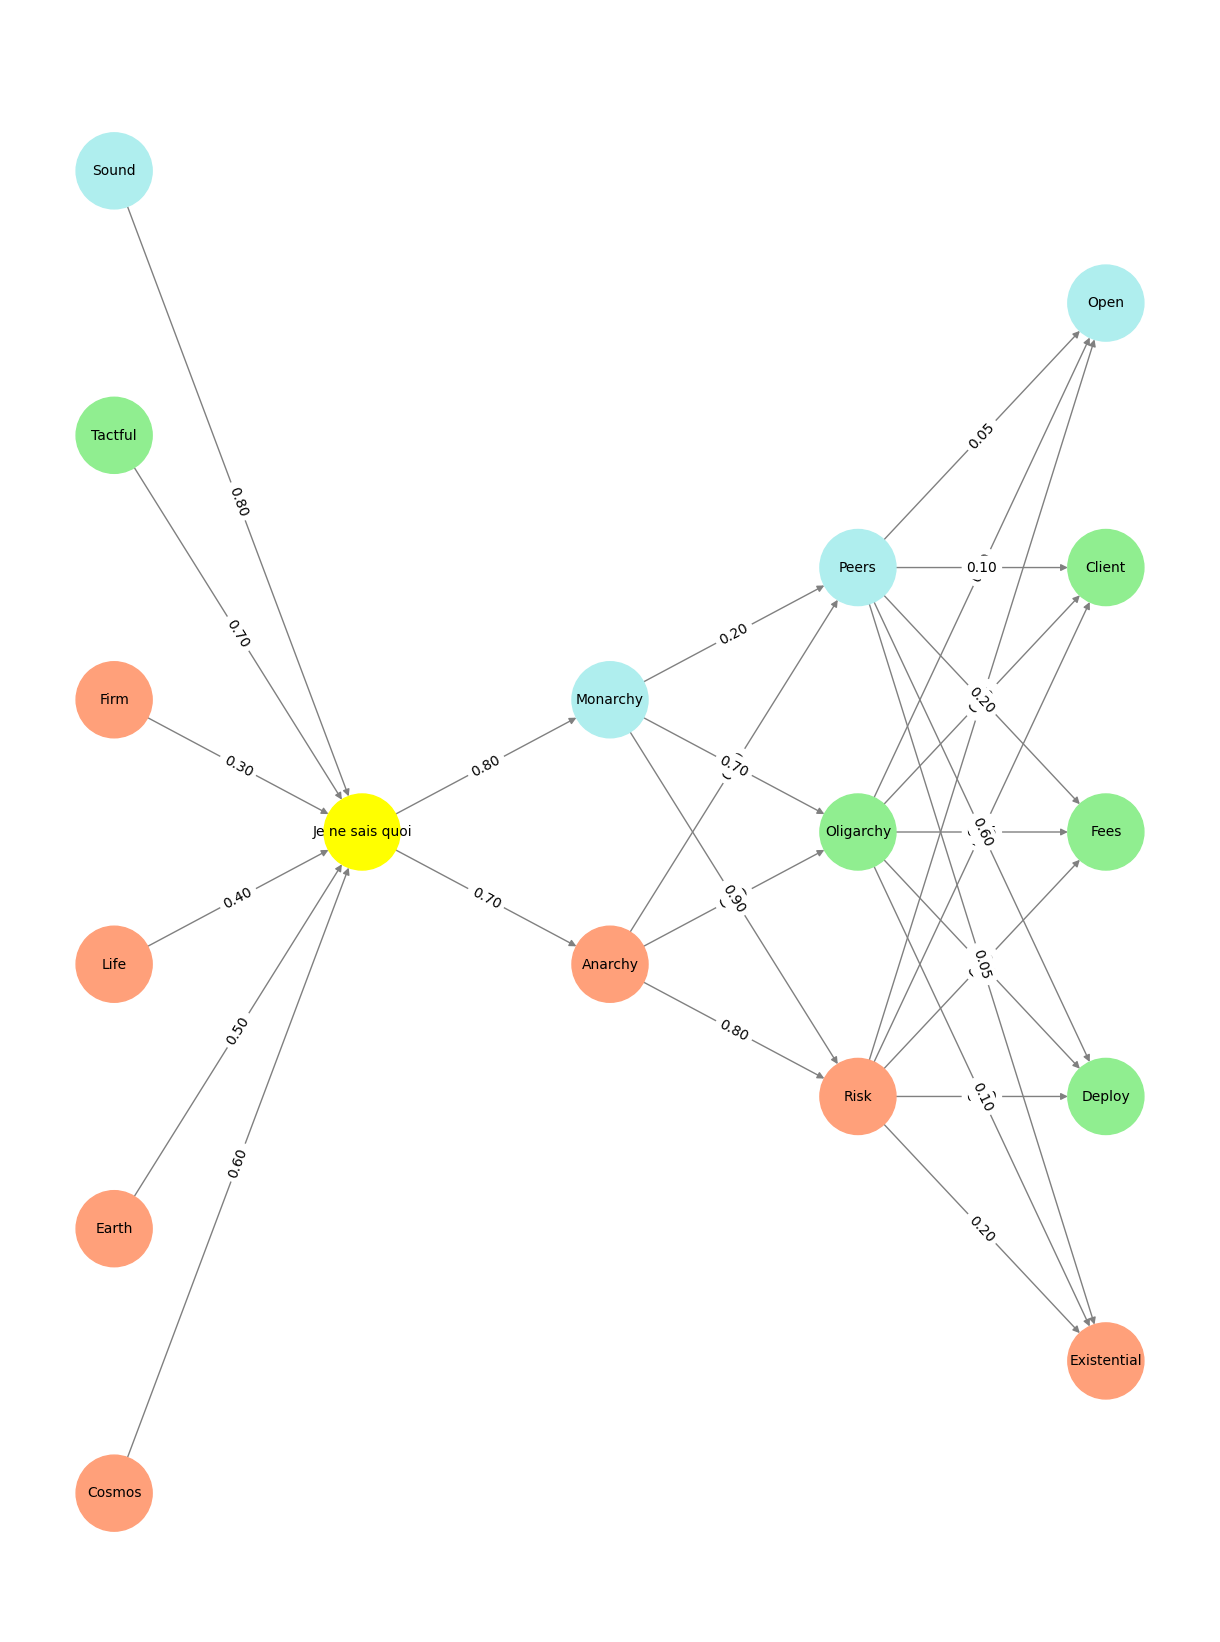

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Define the neural network structure
def define_layers():
    return {
        'Pre-Input': ['Cosmos', 'Earth', 'Life', 'Firm', 'Tactful', 'Sound',   ],
        'Yellowstone': ['Je ne sais quoi'],
        'Input': ['Anarchy', 'Monarchy'],
        'Hidden': [
            'Risk',
            'Oligarchy',
            'Peers',
        ],
        'Output': ['Existential', 'Deploy', 'Fees', 'Client', 'Open',    ]
    }

# Define weights for the connections
def define_weights():
    return {
        'Pre-Input-Yellowstone': np.array([
            [0.6],
            [0.5],
            [0.4],
            [0.3],
            [0.7],
            [0.8],
            [0.6]
        ]),
        'Yellowstone-Input': np.array([
            [0.7, 0.8]
        ]),
        'Input-Hidden': np.array([[0.8, 0.4, 0.1], [0.9, 0.7, 0.2]]),
        'Hidden-Output': np.array([
            [0.2, 0.8, 0.1, 0.05, 0.2],
            [0.1, 0.9, 0.05, 0.05, 0.1],
            [0.05, 0.6, 0.2, 0.1, 0.05]
        ])
    }

# Assign colors to nodes
def assign_colors(node, layer):
    if node == 'Je ne sais quoi':
        return 'yellow'
    if layer == 'Pre-Input' and node in ['Sound', ]:
        return 'paleturquoise'
    elif layer == 'Pre-Input' and node in ['Tactful', ]:
        return 'lightgreen'
    elif layer == 'Input' and node == 'Monarchy':
        return 'paleturquoise'
    elif layer == 'Hidden':
        if node == 'Peers':
            return 'paleturquoise'
        elif node == 'Oligarchy':
            return 'lightgreen'
        elif node == 'Risk':
            return 'lightsalmon'
    elif layer == 'Output':
        if node == 'Open':
            return 'paleturquoise'
        elif node in ['Client', 'Fees', 'Deploy']:
            return 'lightgreen'
        elif node == 'Existential':
            return 'lightsalmon'
    return 'lightsalmon'  # Default color

# Calculate positions for nodes
def calculate_positions(layer, center_x, offset):
    layer_size = len(layer)
    start_y = -(layer_size - 1) / 2  # Center the layer vertically
    return [(center_x + offset, start_y + i) for i in range(layer_size)]

# Create and visualize the neural network graph
def visualize_nn():
    layers = define_layers()
    weights = define_weights()
    G = nx.DiGraph()
    pos = {}
    node_colors = []
    center_x = 0  # Align nodes horizontally

    # Add nodes and assign positions
    for i, (layer_name, nodes) in enumerate(layers.items()):
        y_positions = calculate_positions(nodes, center_x, offset=-len(layers) + i + 1)
        for node, position in zip(nodes, y_positions):
            G.add_node(node, layer=layer_name)
            pos[node] = position
            node_colors.append(assign_colors(node, layer_name))

    # Add edges and weights
    for layer_pair, weight_matrix in zip(
        [('Pre-Input', 'Yellowstone'), ('Yellowstone', 'Input'), ('Input', 'Hidden'), ('Hidden', 'Output')],
        [weights['Pre-Input-Yellowstone'], weights['Yellowstone-Input'], weights['Input-Hidden'], weights['Hidden-Output']]
    ):
        source_layer, target_layer = layer_pair
        for i, source in enumerate(layers[source_layer]):
            for j, target in enumerate(layers[target_layer]):
                weight = weight_matrix[i, j]
                G.add_edge(source, target, weight=weight)

    # Customize edge thickness for specific relationships
    edge_widths = []
    for u, v in G.edges():
        if u in layers['Hidden'] and v == 'Kapital':
            edge_widths.append(6)  # Highlight key edges
        else:
            edge_widths.append(1)

    # Draw the graph
    plt.figure(figsize=(12, 16))
    nx.draw(
        G, pos, with_labels=True, node_color=node_colors, edge_color='gray',
        node_size=3000, font_size=10, width=edge_widths
    )
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f'{v:.2f}' for k, v in edge_labels.items()})
    plt.title(" ")
    
    # Save the figure to a file
    # plt.savefig("figures/logo.png", format="png")

    plt.show()

# Run the visualization
visualize_nn()

```{figure} ../figures/blanche.*
---
width: 1
height: 1
---
_Je ne sais quoi or Latent Variable_. This is an *a priori* node that compresses "a lot"
```

### The School of Athens as the Ideal Balance

Raphael’s *The School of Athens* represents the perfect compression of these three modes of history. Apollo’s monumental ideal inspires; Athena’s critical adversariality protects; the philosophers’ antiquarianism roots us in the continuity of human endeavor. Nietzsche’s essay, like Raphael’s painting, is a call to balance these modes rather than letting one dominate. Modernity, however, has lost this balance. The *School of Resentment* amplifies critical history to the exclusion of the monumental and antiquarian, resulting in a hollow, one-dimensional worldview that cannot sustain itself.

### Nietzsche’s Greatest Essays in Context

This dynamic is precisely why Nietzsche’s *The Uses and Abuses of History* is so vital—it outlines how history can serve life rather than oppress it. Nietzsche’s critique of unbalanced historical modes resonates with his later work in *Genealogy of Morality*, where he dissects the origins of resentment and its corrosive effects on culture. Both essays seek to uncover the structures that sustain civilization while warning against the distortions that lead to its decay.

As for *An Attempt at Self-Criticism*, it is Nietzsche’s Apollo—a monumental reflection on his own work and its aspirations. It sets the tone for his later critiques, grounding them in the aspiration toward something greater. Together, these essays form a philosophical *School of Athens*, where the interplay of aspiration, critique, and preservation reveals the architecture of human progress.

### Conclusion: Resentment as the Anti-History

The *School of Resentment*, by contrast, rejects this balance. It distorts critical history into outright destruction, dismisses monumental history as patriarchal delusion, and trivializes antiquarian history as nostalgic irrelevance. Its adherents—modern feminists, pacifists, and Marxists alike—fail to see that their rejection of the past undermines the very foundation of the future.

Civilization cannot endure without Apollo’s vision, Athena’s vigilance, and the philosophers’ continuity. Nietzsche saw this, Raphael painted it, and I articulate it now: the *School of Athens* is the ideal. The *School of Resentment* is an abortion of backpropagation, a misguided attempt to rewrite the neural network of humanity by erasing its structure entirely. Those who fail to see this are blind to history, blind to art, and blind to the very forces that sustain their existence.

